In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
x = np.random.randint(0, 2, 10)
x

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [76]:
bp = 0.000001

In [77]:
bit = np.array([])
for n in range(len(x)):
    if x[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))
len(bit)

1000

In [78]:
t1 = np.arange(bp/100, 100*len(x)*(bp/100) + bp/100, bp/100)
t1 = t1[0:len(t1)-1]
len(t1)

1000

Text(0.5, 1.0, 'Transmitting Information as Digital Signal')

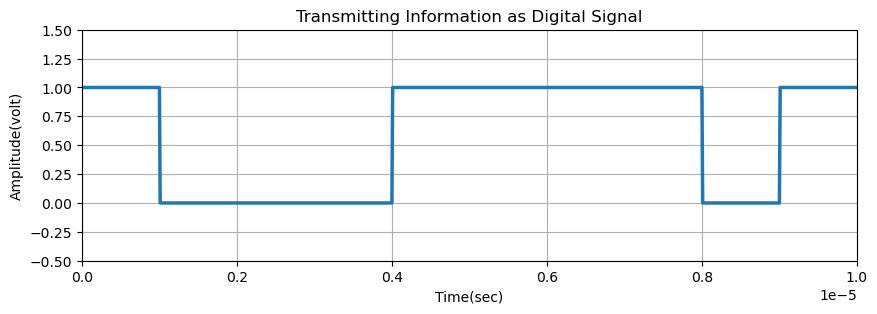

In [79]:
plt.figure(figsize=(10, 3))
plt.plot(t1, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp*len(x), -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Transmitting Information as Digital Signal')

**binary FSK Modulation**

In [80]:
A = 5
br = 1/bp
f1 = br*10
f2 = br*1

In [81]:
t2 = np.arange(bp/99, bp + bp/99, bp/99)
len(t2)

99

In [82]:
ss = len(t2)

In [83]:
m = np.array([])
for i in range(len(x)):
    if x[i] == 1:
        y = A * np.cos(2*np.pi*f1*t2)
    else:
        y = A * np.cos(2*np.pi*f2*t2)
    m = np.concatenate((m, y))
len(m)

990

In [84]:
t3 = np.arange(bp/99, bp*len(x) + bp/99, bp/99)
len(t3)

990

Text(0.5, 1.0, 'Waveform for binary FSK Modulation Corresponding Binary Information')

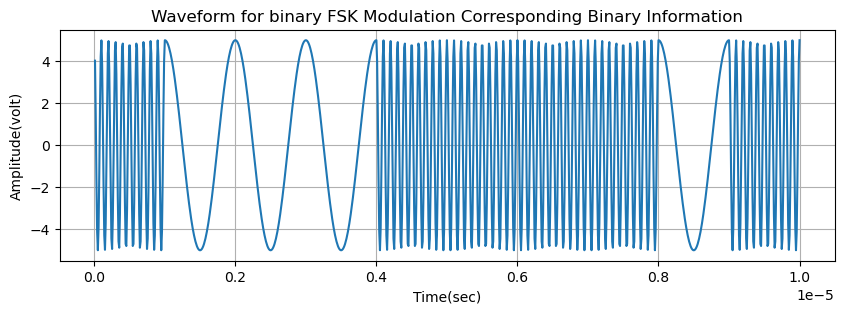

In [85]:
plt.figure(figsize=(10,3))
plt.plot(t3, m)
plt.grid(True)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude(volt)')
plt.title('Waveform for binary FSK Modulation Corresponding Binary Information')

**Binary FSK Demodulation**

In [110]:
mn = np.array([])
for n in range(ss-1, len(m), ss):
    t = np.arange(bp/99, bp + bp/99, bp/99)
    y1 = np.cos(2*np.pi*f1*t)
    y2 = np.cos(2*np.pi*f2*t)
    segment = m[n-ss+1:n+1]
    mm = y1 * segment
    mmm = y2 * segment
    z1 = np.trapz(mm, t)
    z2 = np.trapz(mmm, t)
    zz1 = round((2*z1/bp))
    zz2 = round((2*z2/bp))
    if zz1 > A/2:
        a = 1
    elif zz2 > A/2:
        a = 0
    mn = np.append(mn, a)

In [111]:
len(mn)

10

In [112]:
bit = np.array([])
for n in range(len(mn)):
    if mn[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

In [117]:
t4 = np.arange(bp/100, 100*len(mn)*(bp/100) + bp/100, bp/100)
t4 = t4[:len(bit)]
len(t4)

1000

Text(0.5, 1.0, 'Received Information as Digital Signal')

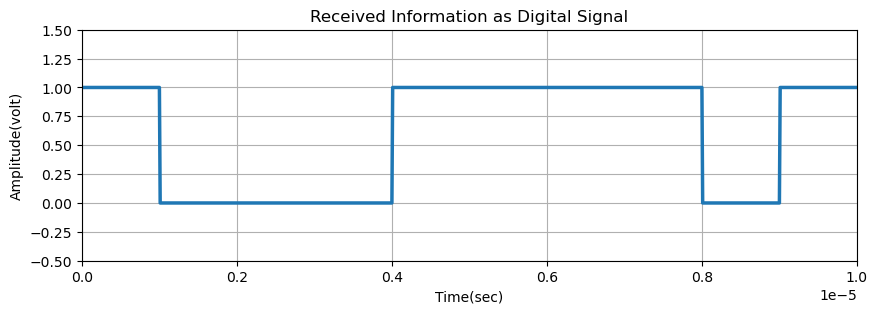

In [118]:
plt.figure(figsize=(10,3))
plt.plot(t4, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp*len(mn), -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Received Information as Digital Signal')